### Sentiment Analysis Practical Task- Book Review

In [1]:
import transformers
from transformers import pipeline
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('book_reviews_sample.csv')
data.head()

,index,reviewText,rating
0,11494,Clean and funny. A bit busy with all the diffe...,3
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4
2,1463,Good thing that this is a free story. I read i...,1
3,10342,"Action, action, action! Equipment keeps gettin...",4
4,5256,this was hands down the worse book i have ever...,1


In [3]:
data['reviewText']

0     Clean and funny. A bit busy with all the diffe...
1     Alex a sexy hot cop and the PhD candidate. Wha...
2     Good thing that this is a free story. I read i...
3     Action, action, action! Equipment keeps gettin...
4     this was hands down the worse book i have ever...
                            ...                        
95    Love this author. I have read most of her book...
96    This book was not bad! I like the storyline ! ...
97    This is part of a series I read and I loved th...
98    Finally a Texas newspaper in Kindle format.Way...
99    TJ and Jon are very HOT in this book.  Christi...
Name: reviewText, Length: 100, dtype: object

#### We want to convert our text to lowercase and remove punctuations

In [4]:
data['reviewText_clean']= data['reviewText'].str.lower()

In [5]:
data['reviewText_clean']= data.apply(lambda x: re.sub(r"([^\w\s])", '', x['reviewText_clean']), axis=1)
data.head()

,index,reviewText,rating,reviewText_clean
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...


In [6]:
vaderSentiment = SentimentIntensityAnalyzer()

In [7]:
data['vaderSentiment_score'] = data['reviewText_clean'].apply(lambda review: vaderSentiment.polarity_scores(review)['compound'])

In [8]:
data.head()

,index,reviewText,rating,reviewText_clean,vaderSentiment_score
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...,0.7684
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...,0.9325
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...,0.6740
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...,0.6652
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...,-0.4767


#### We now categorize the sentiment scores

In [9]:
bins = [-1, -0.1, 0.1, 1]
names = ['negative', 'neutral', 'positive']

data['vaderSentiment_label'] = pd.cut(data['vaderSentiment_score'], bins, labels = names)

In [10]:
data.head()

,index,reviewText,rating,reviewText_clean,vaderSentiment_score,vaderSentiment_label
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...,0.7684,positive
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...,0.9325,positive
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...,0.6740,positive
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...,0.6652,positive
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...,-0.4767,negative


#### We want to visualize the reviews

<Axes: xlabel='vaderSentiment_label'>

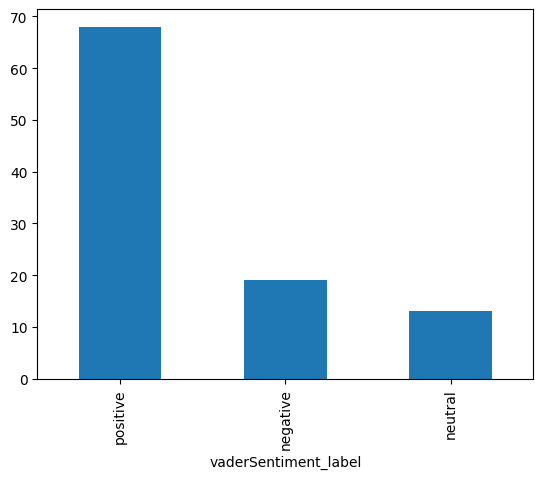

In [11]:
data['vaderSentiment_label'].value_counts().plot.bar()

### Pre-trained Transformer Models

In [12]:
transformer_pipeline = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0


In [13]:
transformer_labels = []

for review in data['reviewText_clean'].values:
    sentiment_list = transformer_pipeline(review)
    sentiment_label = [sent['label'] for sent in sentiment_list]
    transformer_labels.append(sentiment_label)
    
data['transformer_sentiment_label'] = transformer_labels

<Axes: xlabel='transformer_sentiment_label'>

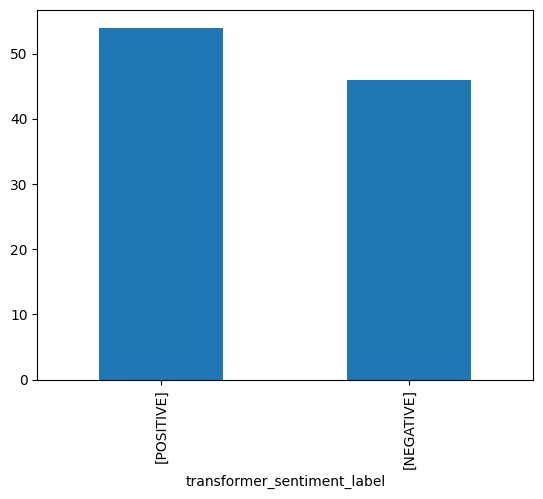

In [15]:
data['transformer_sentiment_label'].value_counts().plot.bar()